In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
#mpld3.enable_notebook()
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [5]:
from src import transform 
from src import read_log_file as readlog
# filename = "datasets/s_short"
# filename = "datasets/g1_long"
filename = "datasets/solr-out.log"
database_table = readlog.get_parsed_data_from_file(filename)
# print(database_table)

   DateTime TimeFromStart_seconds   EventType            EventName  \
0      None                 1.084       Pause                Young   
1      None                 1.084  Concurrent  Clear Claimed Marks   
2      None                 1.092  Concurrent    Scan Root Regions   
3      None                 1.094  Concurrent      Mark From Roots   
4      None                 1.094  Concurrent             Preclean   
..      ...                   ...         ...                  ...   
81     None               3275.97       Pause                Young   
82     None               3357.76       Pause                Young   
83     None              3444.136       Pause                Young   
84     None               3528.04       Pause                Young   
85     None              3609.228       Pause                Young   

                            AdditionalEventInfo       MemoryChange_MB  \
0   (Concurrent Start) (Metadata GC Threshold)        88M->9M(24576M)   
1            

### Seperate the stop the world and concurrent events for analysis
### Then, for each event name, create a list of all corresponding data tables

In [6]:
stw_table, concurrent_table = transform.seperate_pauses_concurrent(database_table)
stw_seperated_tables = transform.seperate_by_event_name(stw_table)
concurrent_seperated_tables = transform.seperate_by_event_name(concurrent_table)

### Plot the concurrent and stop the world periods


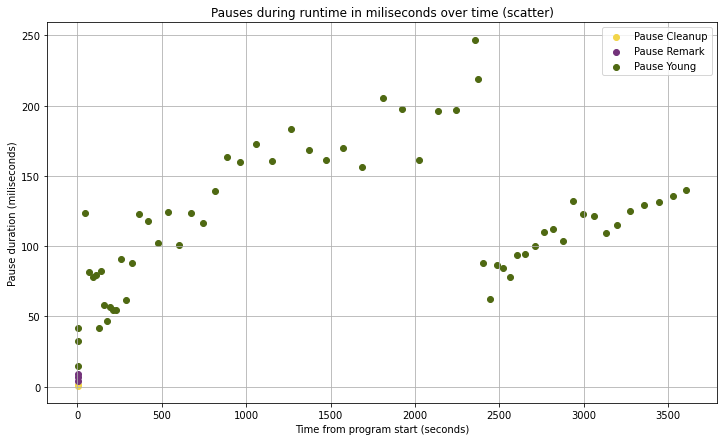

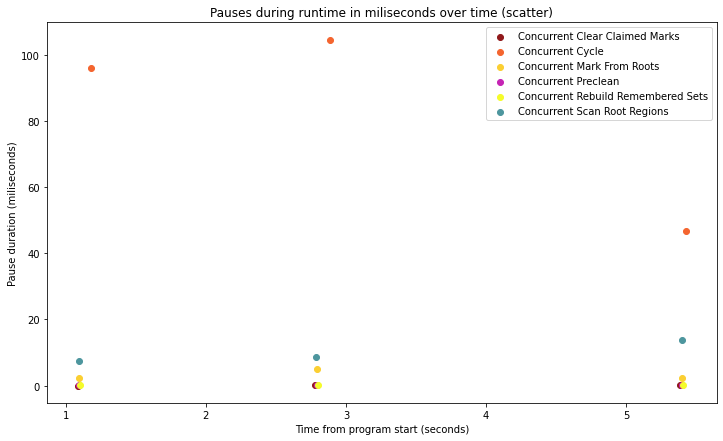

In [7]:
from src import graphing as graph
# Stop the world pauses. Use the seperated events to see each type of pause
stw_time_lists, stw_duration_lists = transform.get_times_and_durations_from_event_lists(stw_seperated_tables)
labels = transform.get_event_table_labels(stw_seperated_tables)
plot = graph.comparrison_scatter(stw_time_lists, stw_duration_lists, None, None, labels)

# Concurrent periods. Use the seperated events to see each type of concurrent duration
c_time_lists, c_duration_lists = transform.get_times_and_durations_from_event_lists(concurrent_seperated_tables)
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.comparrison_scatter(c_time_lists, c_duration_lists, None, None, labels)

### Time spent in Concurrent Phases vs. Stop The World phases

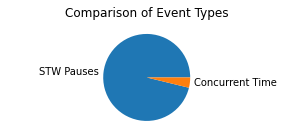

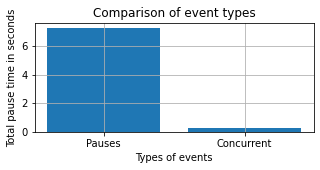

In [8]:
plt.rcParams["figure.figsize"] = [5, 2] # make this figure smaller (not needed to be large)
import numpy as np
_ = graph.compare_eventtypes_pie(database_table)
ax = graph.compare_eventtypes_bar(database_table)
ax.set_xticks(np.arange(2))
ax.set_xticklabels(["Pauses", "Concurrent"])

plt.rcParams["figure.figsize"] = [12, 7] # Return figure to default size

### Print trends about the events based on Event Type and Name

In [9]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t =========== Concurrent Vs Pauses Table ===========\n")
stw_times,stw_durations    = transform.get_time_and_event_durations(stw_table)
concurrent_times, concurrent_durations = transform.get_time_and_event_durations(concurrent_table)
graph.compare_trends([stw_durations, concurrent_durations], labels = labels, lists_of_timestamps = [stw_times, concurrent_times])
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Table ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_trends(c_duration_lists, labels = labels)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Table ===========\n")
graph.compare_trends(stw_duration_lists, labels = labels)



		 =========== Concurrent Vs Pauses Table ===========

 Trends (ms)      |  Event Count|  Max pause  |  Sum pauses |  Mean pauses|  Std Dev.   | Throughput   |
--------------------------------------------------------------------------------------------------------
Pauses            | 68          | 246.997     | 7253.67     | 106.6716    | 56.7114     | 99.8%       | 
Concurrent        | 18          | 104.549     | 287.827     | 15.9904     | 31.6552     | 94.7%       | 




			=========== Concurrent Table ===========

 Trends (ms)      |  Event Count|  Max pause  |  Sum pauses |  Mean pauses|  Std Dev.   |
-----------------------------------------------------------------------------------------
Clear Claimed Mar | 3           | 0.12        | 0.222       | 0.074       | 0.033       | 
Cycle             | 3           | 104.549     | 246.985     | 82.3283     | 25.4988     | 
Mark From Roots   | 3           | 5.136       | 9.758       | 3.2527      | 1.333       | 
Preclean          | 3  

### Compare percentiles for pauses/concurrent phases, general and specific


In [10]:
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["Pauses", "Concurrent"]

print("\t\t\t=========== Concurrent Vs Pauses ===========\n")
graph.compare_pauses_percentiles([stw_durations, concurrent_durations], labels = labels)
print("\n\n\n")


# Concurrent pauses comparison
print("\t\t\t=========== Concurrent Percentiles ===========\n")
labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
graph.compare_pauses_percentiles(c_duration_lists, labels = labels)


print("\n\n\n")

# Stop the world pauses comparison
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
print("\t\t\t=========== Pauses Percentiles ===========\n")
graph.compare_pauses_percentiles(stw_duration_lists, labels = labels)




			=========== Concurrent Vs Pauses ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Pauses     | 109.92 ms | 139.23 ms | 175.76 ms | 197.53 ms | 228.04 ms | 245.1 ms  | 246.81 ms | 
Concurrent | 1.27 ms   | 8.28 ms   | 61.38 ms  | 97.12 ms  | 103.06 ms | 104.4 ms  | 104.53 ms | 




			=========== Concurrent Percentiles ===========

Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
Clear Clai | 0.06 ms   | 0.09 ms   | 0.11 ms   | 0.11 ms   | 0.12 ms   | 0.12 ms   | 0.12 ms   | 
Cycle      | 95.81 ms  | 100.18 ms | 102.8 ms  | 103.68 ms | 104.37 ms | 104.53 ms | 104.55 ms | 
Mark From  | 2.38 ms   | 3.76 ms   | 4.59 ms   | 4.86 ms   | 5.08 ms   | 5.13 ms   | 5.14 ms   | 
Preclean   | 0.1

### Average time in seconds per phase  / grouping

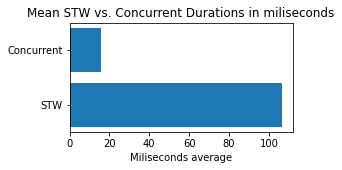

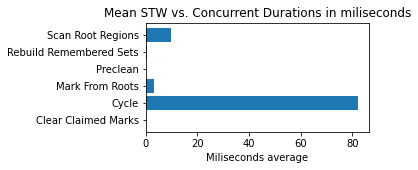

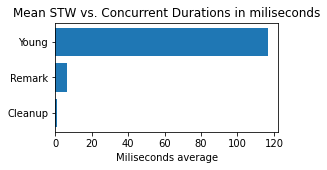

In [11]:
import numpy as np
plt.rcParams["figure.figsize"] = [4, 2]
# Compare stop the world vs concurrent IN GENERL (not specific sub categories)
labels = ["STW", "Concurrent"]
fig, ax = plt.subplots()
y, y1 = stw_durations, concurrent_durations # i know , this is not good code. I will fix this when I turn this into an API Call.
pause_avg = round(sum(y)/len(y), 4)
concurrent_avg = round(sum(y1)/len(y1), 4)
ax.barh(np.arange(len(labels)), [pause_avg, concurrent_avg], align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')
########

labels = transform.get_event_table_labels(concurrent_seperated_tables, eventtype = False)
fig, ax = plt.subplots()
c_duration_averages = []
for i in range(len(c_duration_lists)):
    c_duration_averages.append(sum(c_duration_lists[i]) / len(c_duration_lists[i]))
ax.barh(np.arange(len(c_duration_averages)), c_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')


fig, ax = plt.subplots()
labels = transform.get_event_table_labels(stw_seperated_tables , eventtype = False)
stw_duration_averages = []
for i in range(len(stw_duration_lists)):
    stw_duration_averages.append(sum(stw_duration_lists[i]) / len(stw_duration_lists[i]))
ax.barh(np.arange(len(labels)), stw_duration_averages, align = 'center')
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xlabel('Miliseconds average')
ax.set_title('Mean STW vs. Concurrent Durations in miliseconds')

plt.rcParams["figure.figsize"] = [12, 7]


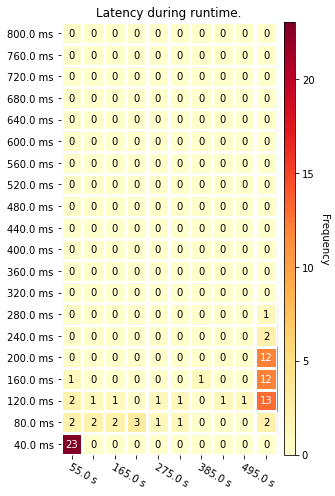

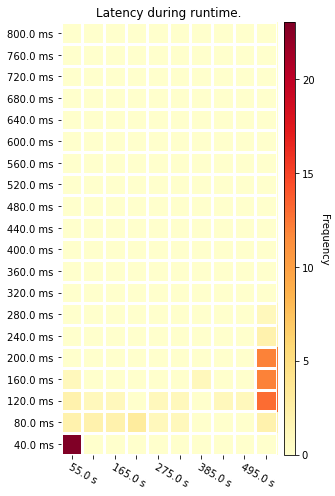

In [12]:
# Show latency heatmap
heatmap, dimensions = transform.get_heatmap_data(database_table, 10, 20, 55, 40, True) # Hides errors with range
                                                                                       # Set true to false 
graph.plot_heatmap(heatmap, dimensions, True)
graph.plot_heatmap(heatmap, dimensions, False)

In [13]:
### Plotting bar lines to display latency: Thicker and taller means longer duration pause.

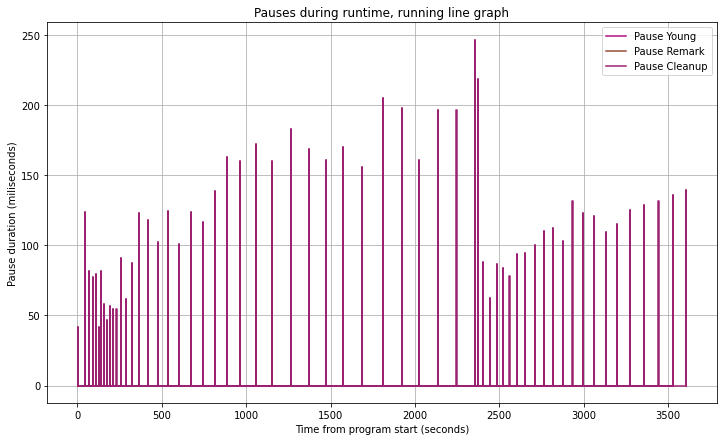

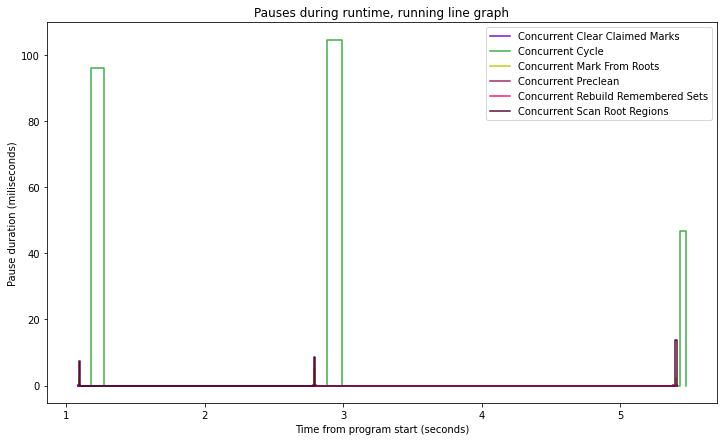

In [14]:
# Pauses during runtime
from src import graphing as graph

# Stop the world pauses
labels = transform.get_event_table_labels(stw_seperated_tables)
labels.reverse() 
graph.compare_paused_running_line(stw_time_lists, stw_duration_lists, None, None, labels, False)

# Concurrent periods
labels = transform.get_event_table_labels(concurrent_seperated_tables)
plot = graph.compare_paused_running_line(c_time_lists, c_duration_lists, None, None, labels)

In [15]:
### Allocation over time

Warning! Maximum heap size must be manually set, and may not be correct.


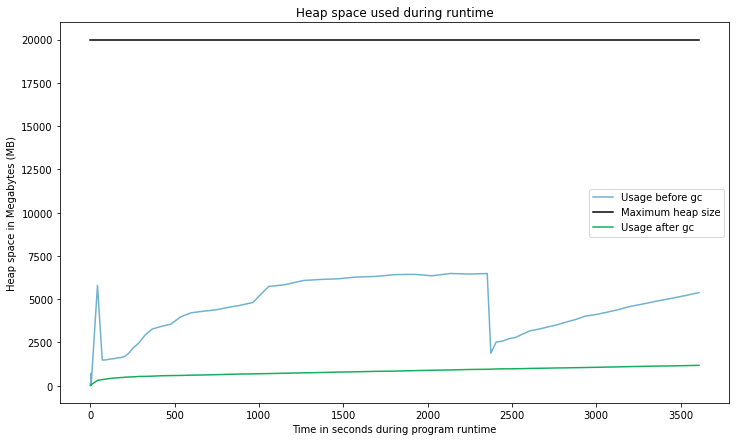

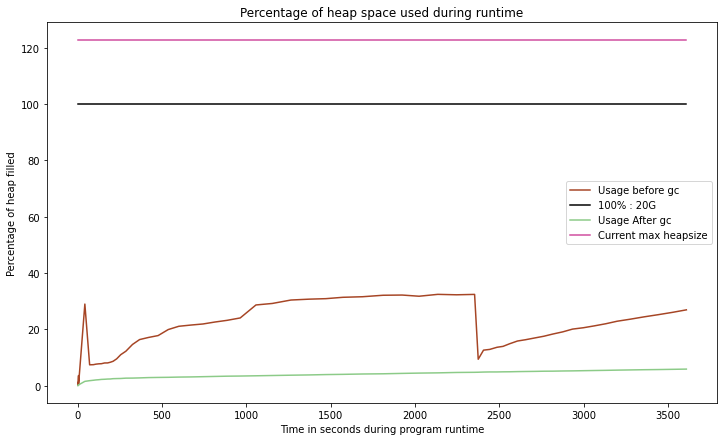

In [16]:
from src import graphing as graph
# Access the memory changed information 
before_gc, after_gc, max_heap, times_selected = transform.get_heap_occupancy(database_table)
max_heapsize = 20
heapsize_unit = "G"
# TODO: It is possible for the following to all be done with a single function call, since no new data is being created. This can be a second API file
print("Warning! Maximum heap size must be manually set, and may not be correct.")
g = graph.plot_heap_occupancy(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
_ = graph.plot_heap_occupancy(times_selected, after_gc, "M", max_heapsize, heapsize_unit, axs = g, label = "Usage after gc", plot_max=False)
# Create a second graph using percentages
g = graph.plot_heap_occupancy_percentage(times_selected, before_gc, "M", max_heapsize, heapsize_unit, label = "Usage before gc")
g = graph.plot_heap_occupancy_percentage(times_selected, after_gc, "M", max_heapsize, heapsize_unit, label = "Usage After gc", axs = g, plot_max = False)
g = graph.plot_heap_occupancy_percentage(times_selected, max_heap, "M", max_heapsize, heapsize_unit, label = "Current max heapsize", axs = g, plot_max = False)
#allo = upl.getHeapAllocation(path1)

In [17]:
### Reclaimed bytes

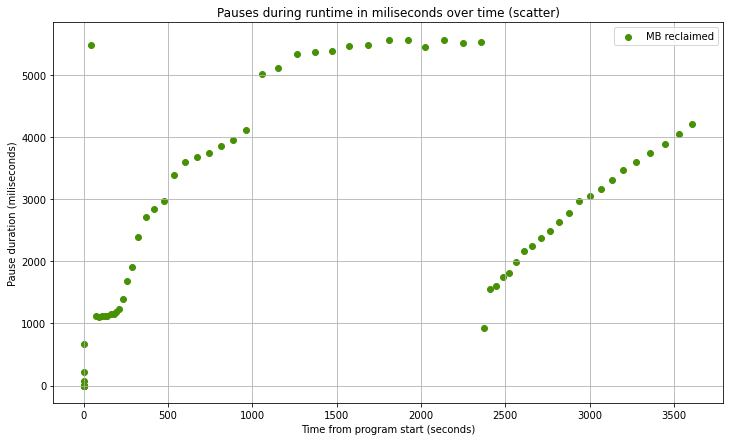

In [18]:
reclaimed, time_seconds = transform.get_reclaimed_mb_over_time(database_table)
f, axs = plt.subplots()
graph.plot_pauses_scatter(time_seconds, reclaimed, axs=axs, label = "MB reclaimed")

In [19]:
### Frequencies of STW pauses (X ms buckets)

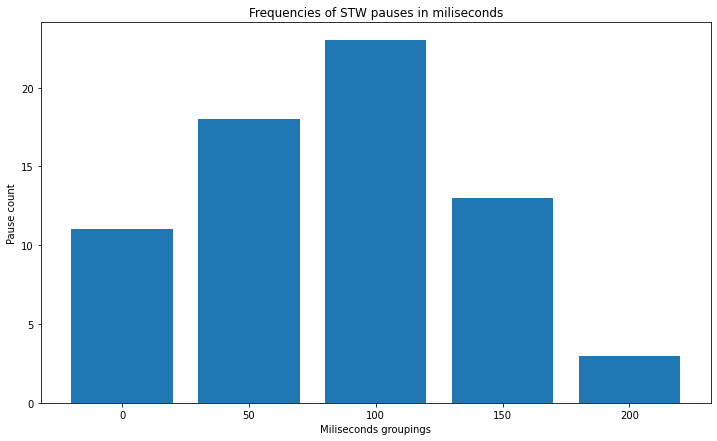

In [21]:
### Frequencies of STW pauses (X ms buckets)
bucket_size_ms = 50
o = transform.group_into_pause_buckets(stw_table, bucket_size_ms)
#######
fig, ax = plt.subplots()
labels = [str(i * bucket_size_ms)  for i in range(len(o))]
ax.bar(labels, height = o, align = 'center')
ax.set_xlabel('Miliseconds groupings')
ax.set_ylabel("Pause count")
_ = ax.set_title('Frequencies of STW pauses in miliseconds')
#fig.autofmt_xdate() # Used if labels are crowded. Enable to auto format rotate labels to fit more cleanly.
